## Analyze a dataset about the westbound traffic on the I-94 Interstate highway

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. 

These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

John Hogue made the dataset available, and it can be downloaded from the UCI Machine Learning Repository here: [datalink](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

In [1]:
import pandas as pd
Metro_I94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(Metro_I94.head())
print(Metro_I94.tail())
print(Metro_I94.info())
print(Metro_I94.columns)

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

|     0     |    1   |     2     |     3     |       4      |        5       |           6           |      7      |         8        |
|:---------:|:------:|:---------:|:---------:|:------------:|:--------------:|:---------------------:|:-----------:|:----------------:|
| 'holiday' | 'temp' | 'rain_1h' | 'snow_1h' | 'clouds_all' | 'weather_main' | 'weather_description' | 'date_time' | 'traffic_volume' |

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

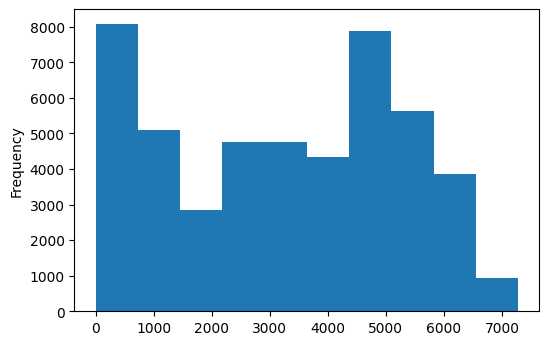

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [3]:
Metro_I94['traffic_volume'].plot.hist()
plt.show()
Metro_I94['traffic_volume'].describe()

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [4]:
Metro_I94['date_time'] = pd.to_datetime(Metro_I94['date_time'])

In [5]:
daytime = Metro_I94.copy()[(Metro_I94['date_time'].dt.hour >= 7) & (Metro_I94['date_time'].dt.hour < 19)]
nighttime = Metro_I94.copy()[(Metro_I94['date_time'].dt.hour >= 19) | (Metro_I94['date_time'].dt.hour < 7)]

In [6]:
daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
nighttime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


Previously, we divided the dataset into two parts:

* Daytime data: hours from 7 AM to 7 PM (12 hours)
* Nighttime data: hours from 7 PM to 7 AM (12 hours)

Now we're going to compare the traffic volume at night and during day.

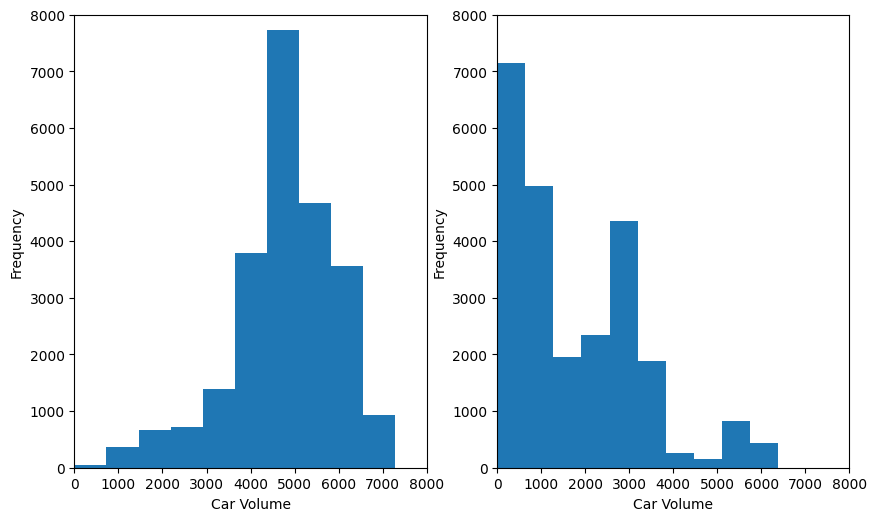

In [8]:
plt.figure(figsize=(10,6))
plt.title('comparison daytime vs nighttime')

plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist()
plt.xlabel('Car Volume')
plt.ylabel('Frequency')
plt.ylim([0, 8000])
plt.xlim([0, 8000])
plt.subplot(1, 2, 2)
nighttime['traffic_volume'].plot.hist()
plt.xlabel('Car Volume')
plt.ylabel('Frequency')
plt.ylim([0, 8000])
plt.xlim([0, 8000])
plt.show()

In [9]:
print('daytime','\n',daytime['traffic_volume'].describe())
print('nighttime','\n',nighttime['traffic_volume'].describe())

daytime 
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
nighttime 
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


What shape do the histograms have and what does that indicate?
* Daytime histogram is similar to a normal distribution, with highest volume above 6,000 cars and 50% of volume above 4,820 cars. 
* Nighttime histogram is skewed to lighter volume, with 75% of volume below 2,819 cars

If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

* No, we should discard nighttime data

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

In [10]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

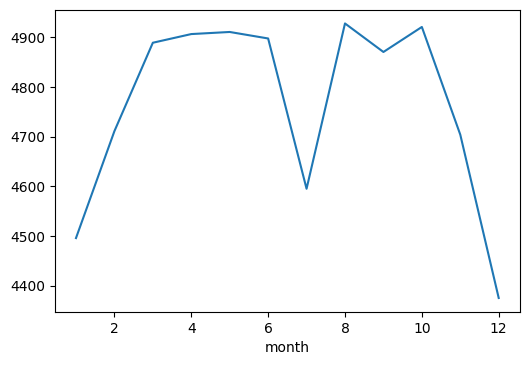

In [11]:
by_month['traffic_volume'].plot()
plt.show()

In [12]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

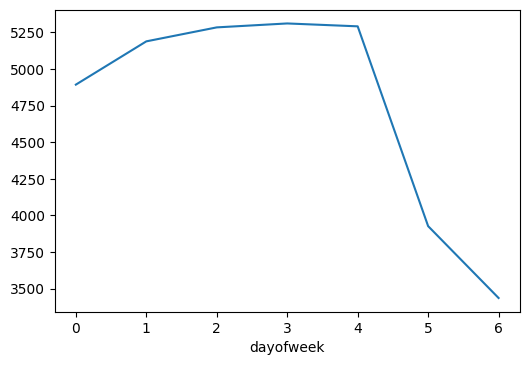

In [13]:
by_dayofweek['traffic_volume'].plot()
plt.show()

Analyze the line plot. Do you notice any interesting exception?
 * Yes, July (7) has a sharp drop

Do you notice any difference between business days and the weekend?

* Yes, weekends show a lower volume

We found that the traffic volume is significantly heavier on business days compared to the weekends.

We'll separate business days from weekends before analyzing variation by time of the day. 

In [15]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


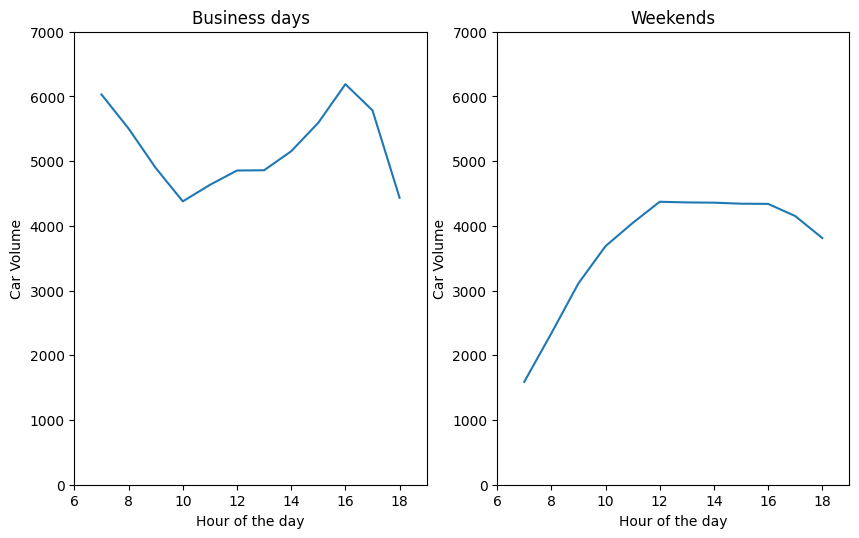

In [18]:
plt.figure(figsize=(10,6))
plt.title('comparison business days vs weekends')

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot()
plt.title('Business days')
plt.xlabel('Hour of the day')
plt.ylabel('Car Volume')
plt.ylim([0, 7000])
plt.xlim([6, 19])
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Weekends')
plt.xlabel('Hour of the day')
plt.ylabel('Car Volume')
plt.ylim([0, 7000])
plt.xlim([6, 19])
plt.show()

Analyze both charts. 
How do they compare? 
* Graphs are very different, with weekends having a lump to increase around 11 am and flat rest of the day, whereas Business days have 2 sharp increases. 
When are the rush hours on business days?
* At 7 am and at 4-5 pm 


We reached the following conclusions:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

In [31]:
features1=list(['traffic_volume','temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description'])

daytime[features1].corr()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000


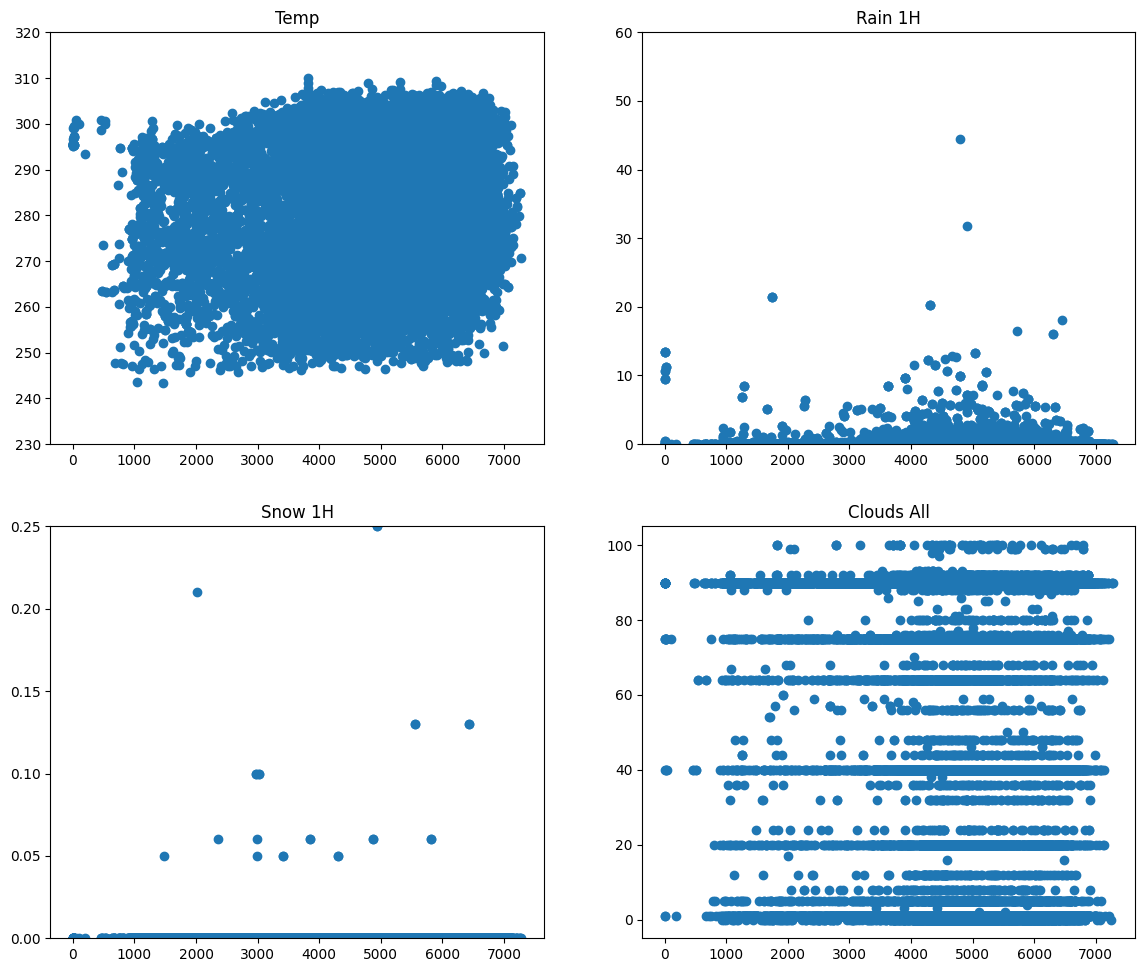

In [49]:
plt.figure(figsize=(14,12))

plt.subplot(2, 2, 1)
plt.scatter(daytime['traffic_volume'], daytime['temp'])
plt.title('Temp')
plt.ylim(230, 320)
plt.subplot(2, 2, 2)
plt.scatter(daytime['traffic_volume'], daytime['rain_1h'])
plt.title('Rain 1H')
plt.ylim(0, 60)
plt.subplot(2, 2, 3)
plt.scatter(daytime['traffic_volume'], daytime['snow_1h'])
plt.ylim(0, 0.25)
plt.title('Snow 1H')
plt.subplot(2, 2, 4)
plt.scatter(daytime['traffic_volume'], daytime['clouds_all'])
plt.title('Clouds All')
plt.show()

Do any of these weather columns seem like reliable indicators for heavy traffic?
* No, none

In [50]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

In [76]:
by_weather_main.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626


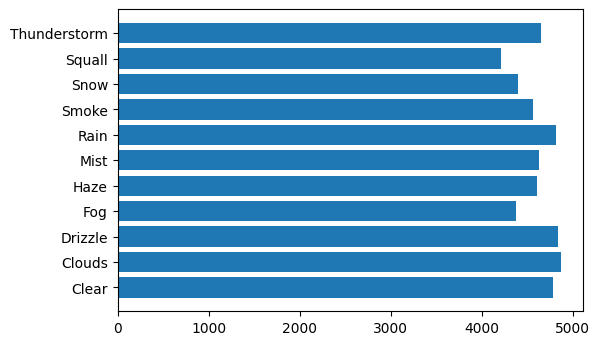

In [78]:
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

Is there any traffic volume exceeding 5,000 cars? 
* No

Can you find any weather type as a heavy traffic indicator?
* No

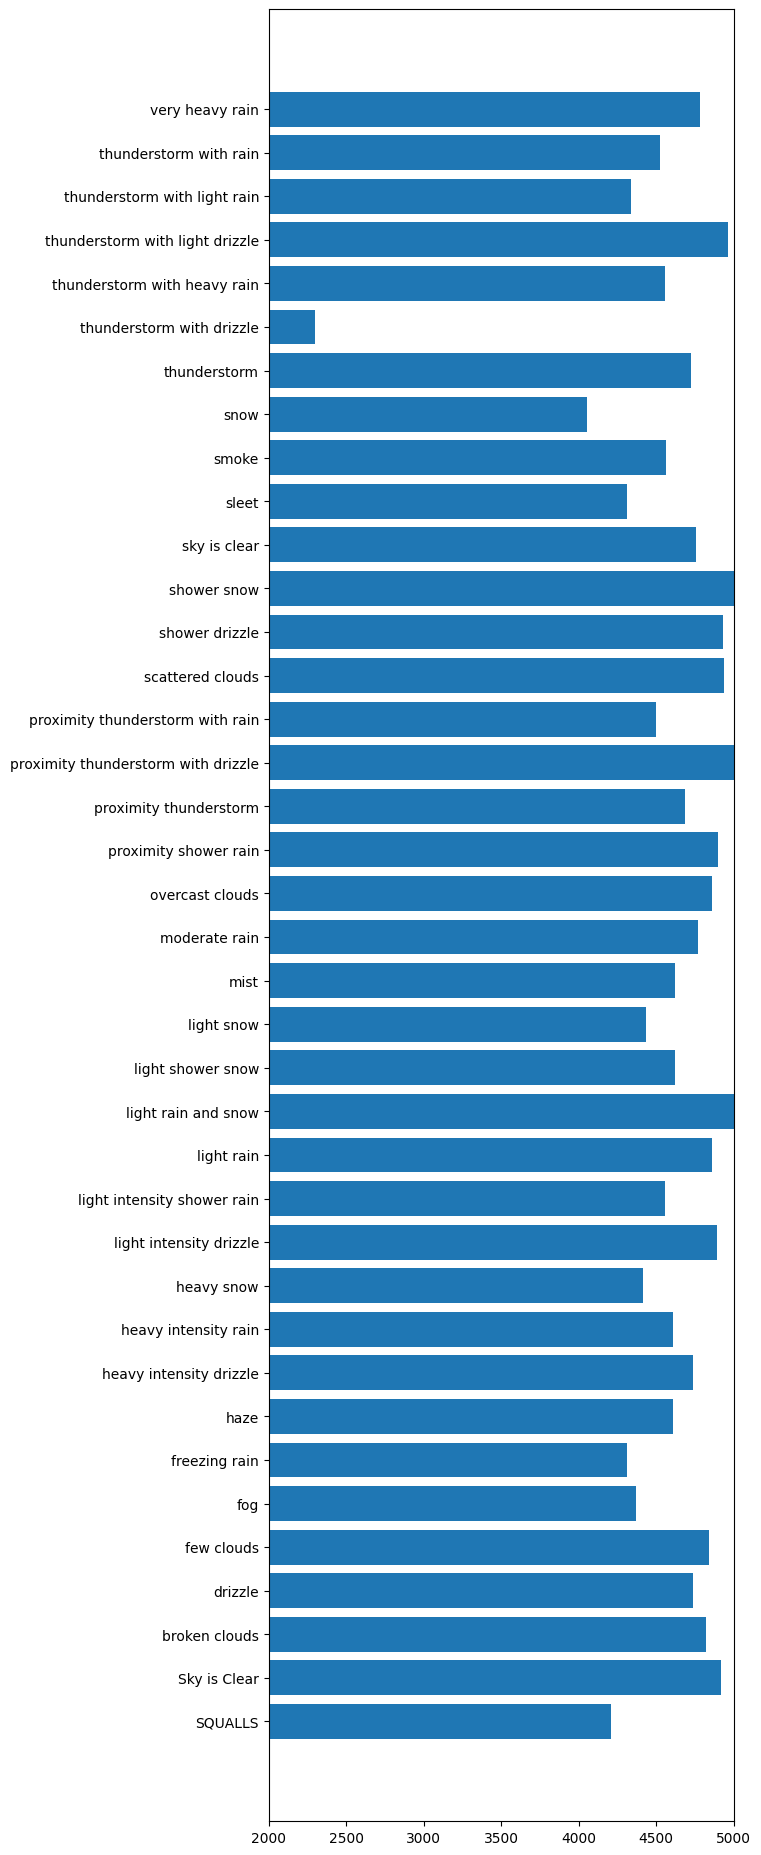

In [93]:
plt.figure(figsize=(6,24))
plt.barh(by_weather_description.index,by_weather_description['traffic_volume'])
plt.xlim(2000, 5000)
plt.show()

Is there any traffic volume exceeding 5,000 cars?
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

Can you find any weather type as a heavy traffic indicator?
* No


Write up your conclusions for the entire project:

* We managed to find two types of indicators using daytime data:
    * Time indicators
        * The traffic is usually heavier during warm months (March–October, except July) compared to cold months (November–February).
        * The traffic is usually heavier on business days compared to the weekends.
        * On business days, the rush hours are around 7 and 16-17.
    * Weather indicators (Not very reliable as indicators)
        * Shower snow
        * Light rain and snow
        * Proximity thunderstorm with drizzle

Now, let's use the nighttime data to look for heavy traffic indicators

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

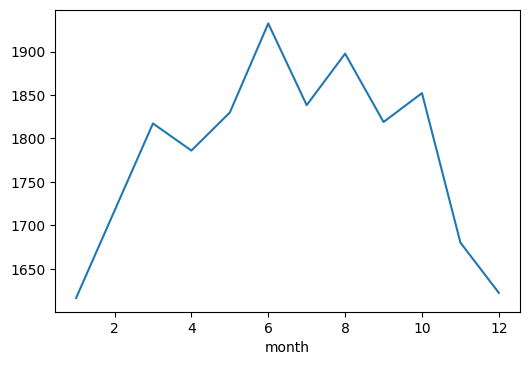

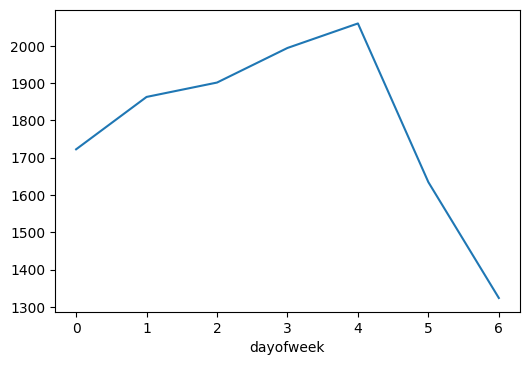

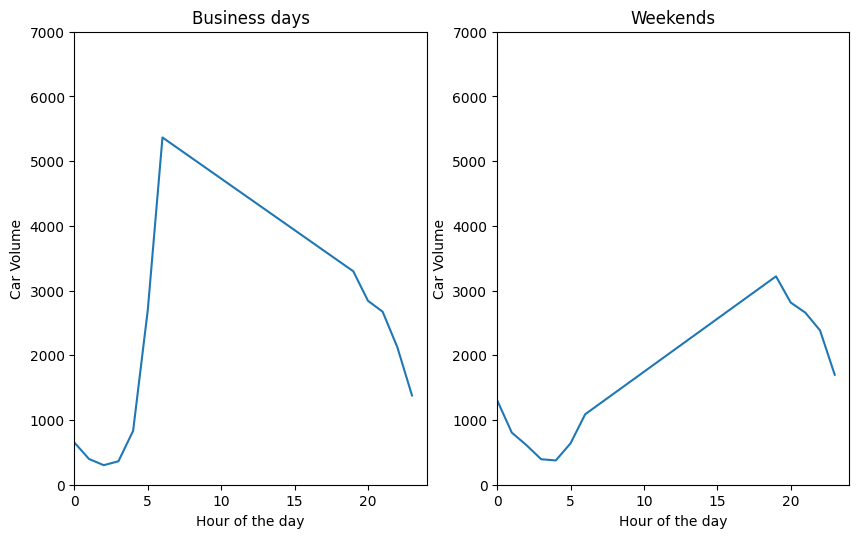

In [99]:
nighttime['month'] = nighttime['date_time'].dt.month
by_month = nighttime.groupby('month').mean()
by_month['traffic_volume']

by_month['traffic_volume'].plot()
plt.show()

nighttime['dayofweek'] = nighttime['date_time'].dt.dayofweek
by_dayofweek = nighttime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

by_dayofweek['traffic_volume'].plot()
plt.show()

nighttime['hour'] = nighttime['date_time'].dt.hour
bussiness_days = nighttime.copy()[nighttime['dayofweek'] <= 4] # 4 == Friday
weekend = nighttime.copy()[nighttime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(10,6))
plt.title('comparison business days vs weekends')

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot()
plt.title('Business days')
plt.xlabel('Hour of the day')
plt.ylabel('Car Volume')
plt.ylim([0, 7000])
plt.xlim([0, 24])
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Weekends')
plt.xlabel('Hour of the day')
plt.ylabel('Car Volume')
plt.ylim([0, 7000])
plt.xlim([0, 24])
plt.show()

                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.094004 -0.012972 -0.007453    0.012832
temp                  0.094004  1.000000  0.091135 -0.021240   -0.087137
rain_1h              -0.012972  0.091135  1.000000 -0.003235    0.079049
snow_1h              -0.007453 -0.021240 -0.003235  1.000000    0.028088
clouds_all            0.012832 -0.087137  0.079049  0.028088    1.000000


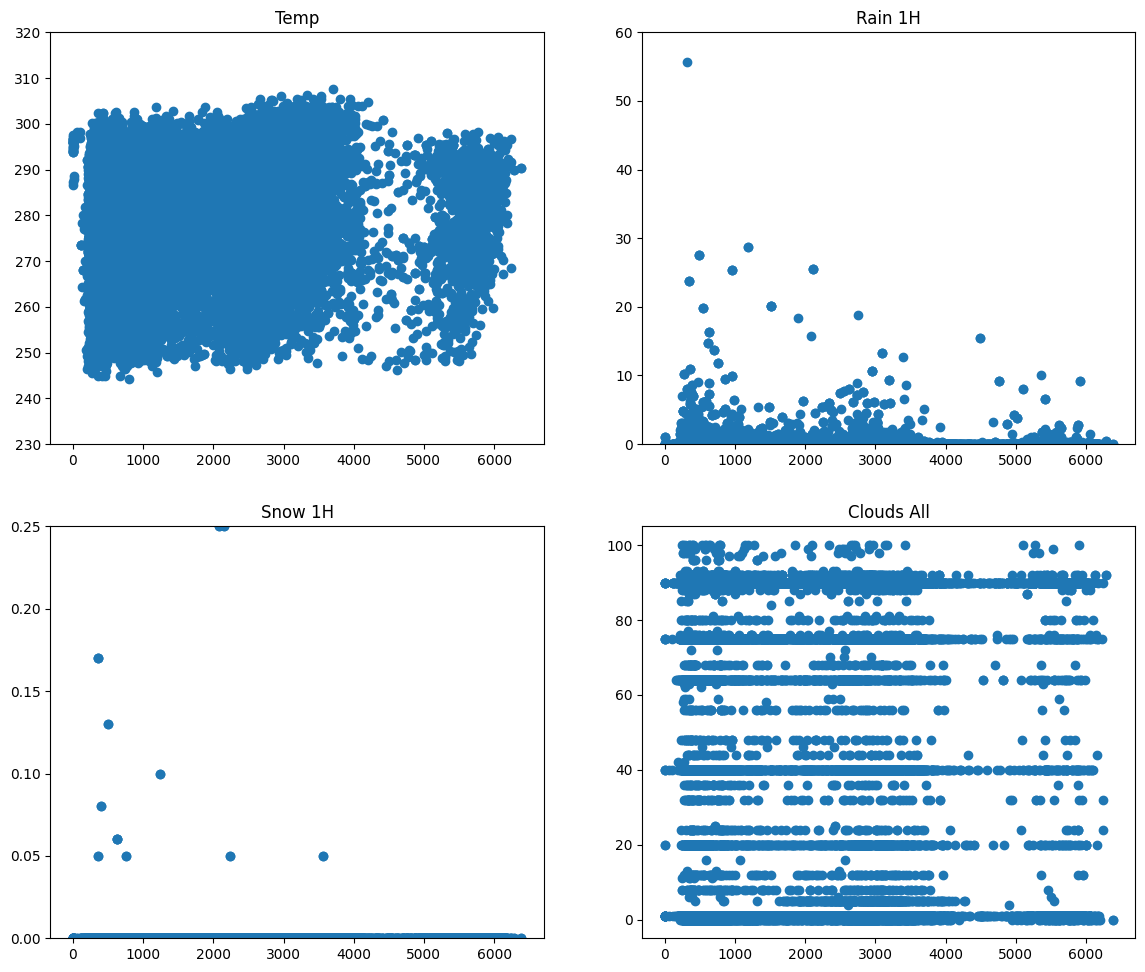

In [102]:
features1=list(['traffic_volume','temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description'])

print(nighttime[features1].corr())

plt.figure(figsize=(14,12))

plt.subplot(2, 2, 1)
plt.scatter(nighttime['traffic_volume'], nighttime['temp'])
plt.title('Temp')
plt.ylim(230, 320)
plt.subplot(2, 2, 2)
plt.scatter(nighttime['traffic_volume'], nighttime['rain_1h'])
plt.title('Rain 1H')
plt.ylim(0, 60)
plt.subplot(2, 2, 3)
plt.scatter(nighttime['traffic_volume'], nighttime['snow_1h'])
plt.ylim(0, 0.25)
plt.title('Snow 1H')
plt.subplot(2, 2, 4)
plt.scatter(nighttime['traffic_volume'], nighttime['clouds_all'])
plt.title('Clouds All')
plt.show()

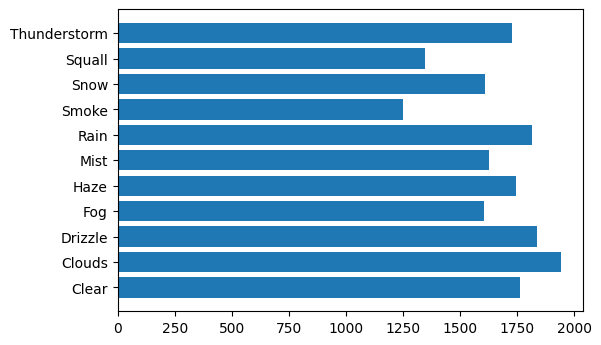

In [103]:
by_weather_main = nighttime.groupby('weather_main').mean()
by_weather_description = nighttime.groupby('weather_description').mean()
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

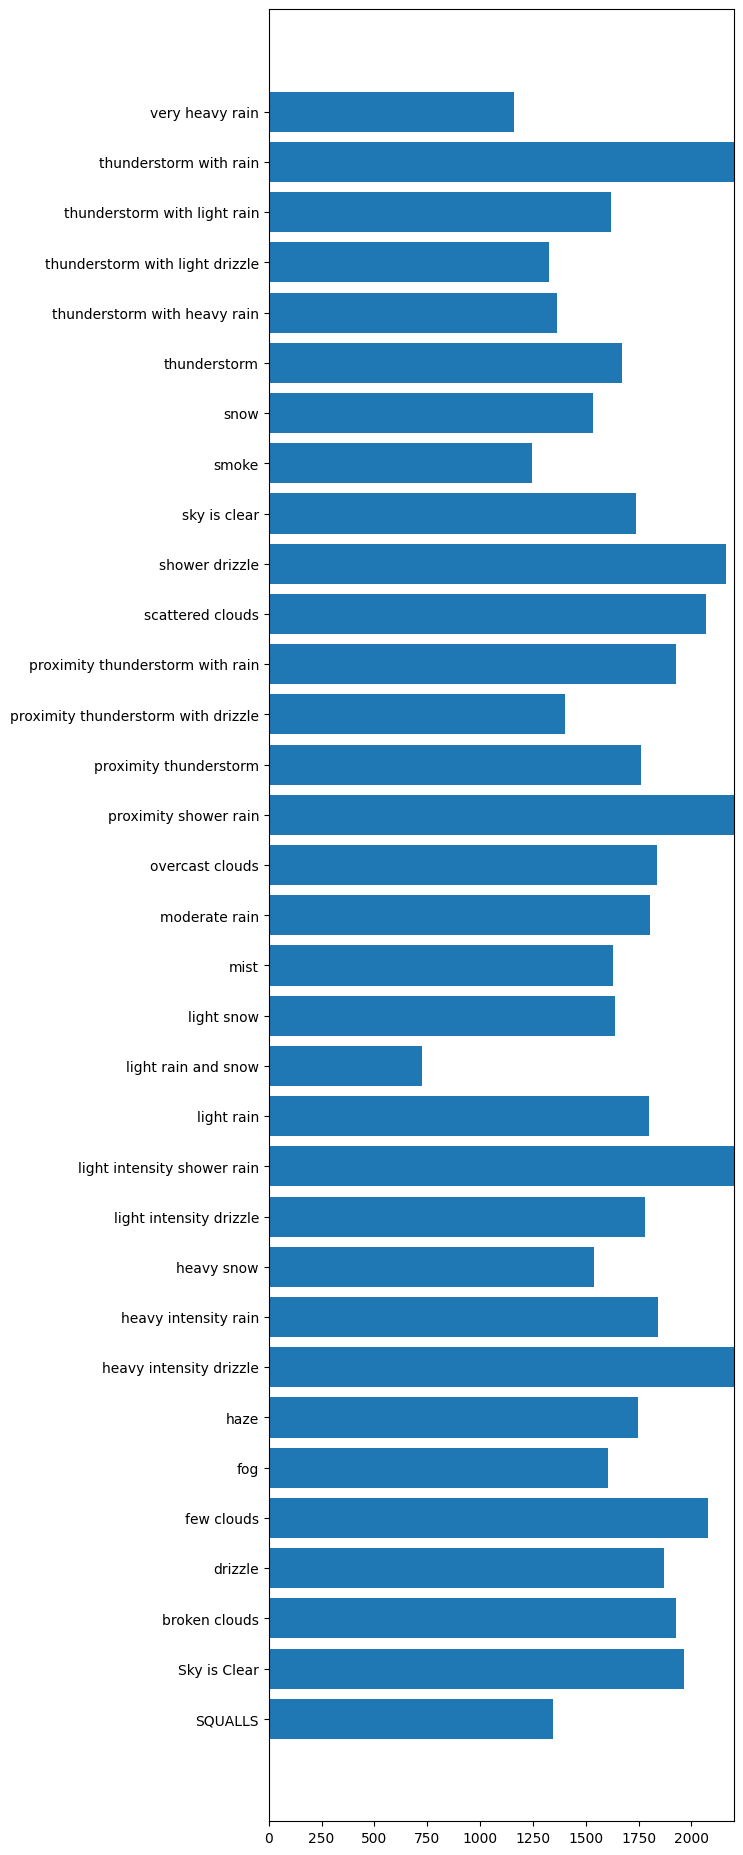

In [107]:
plt.figure(figsize=(6,24))
plt.barh(by_weather_description.index,by_weather_description['traffic_volume'])
plt.xlim(0, 2200)
plt.show()

* Similar to Daytime data, we managed to find two types of indicators using nighttime data:
    * Time indicators
        * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
        * The traffic is usually heavier on business days compared to the weekends.
    * Weather indicators (Not very reliable as indicators)
        * Thunderstorms with rain
        * Light intensity shower rain
        * Proximity shower rain